In [11]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [4]:
# Import the dataset
df = pd.read_csv("diabetes_dirty.csv")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [5]:
# Investigating missing value

df.isnull().sum()

AGE            0
SEX            0
BMI            0
BP             0
S1             0
S2             0
S3             0
S4             0
S5             0
S6             0
PROGRESSION    0
dtype: int64

In [6]:
# Investigating data type
df.dtypes

AGE              int64
SEX              int64
BMI            float64
BP             float64
S1               int64
S2             float64
S3             float64
S4             float64
S5             float64
S6               int64
PROGRESSION      int64
dtype: object

In [7]:
# Differenciate independent variables X
X_feature = df.drop("PROGRESSION",axis=1)

# Differenciate dependent varibale y
y_target = df["PROGRESSION"]


In [8]:
# Check data shape of X and y variables
print(X_feature.shape)
print(y_target.shape)


(442, 10)
(442,)


In [10]:
# The dependent variable needs reshape
y_target = y_target.values.reshape(-1,1)
y_target.shape

(442, 1)

In [ ]:
# Check if the variables follow normal distribution or skewed
X_feature.describe() # Compare the mean values with the median values seems preprocessing is needed

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


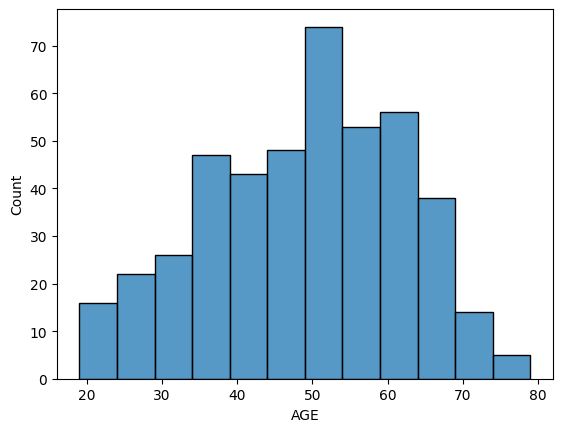

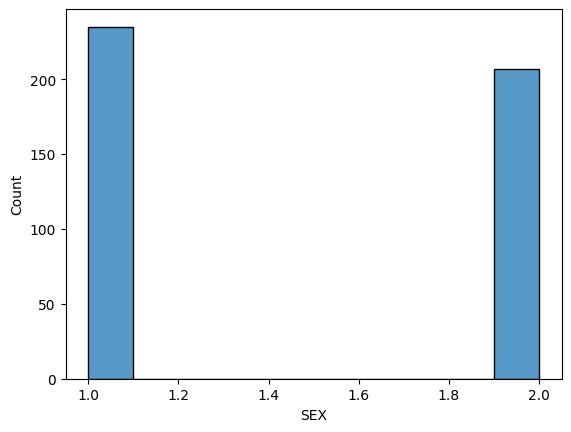

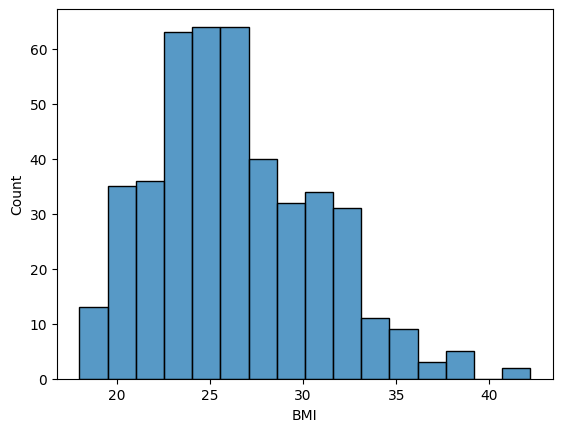

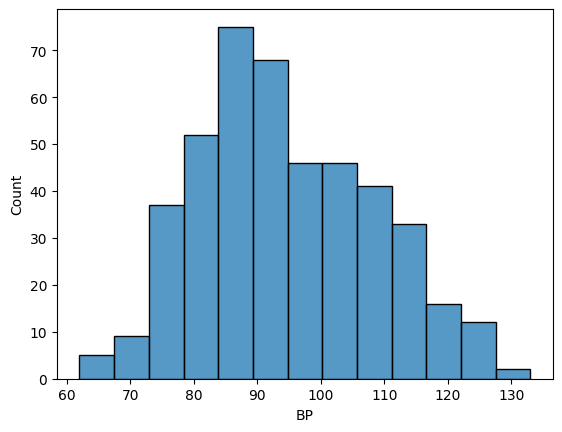

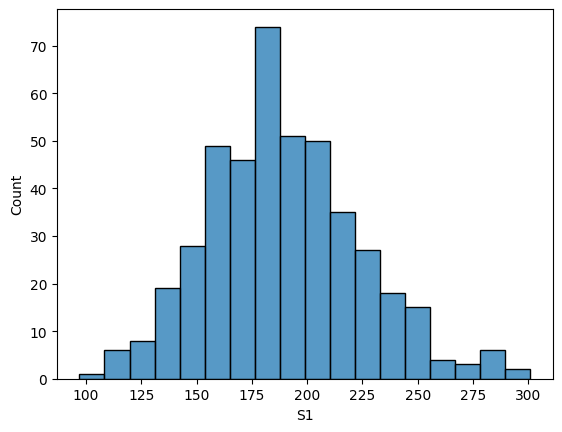

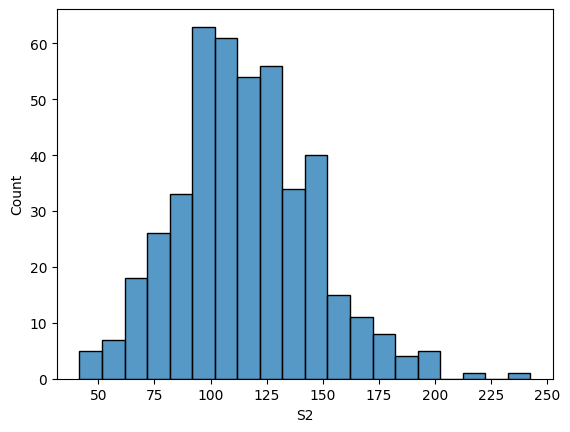

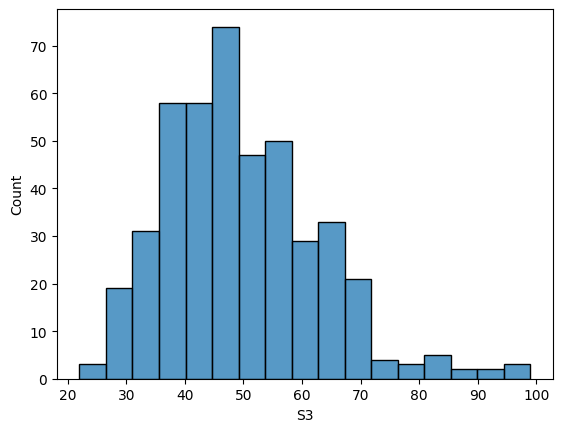

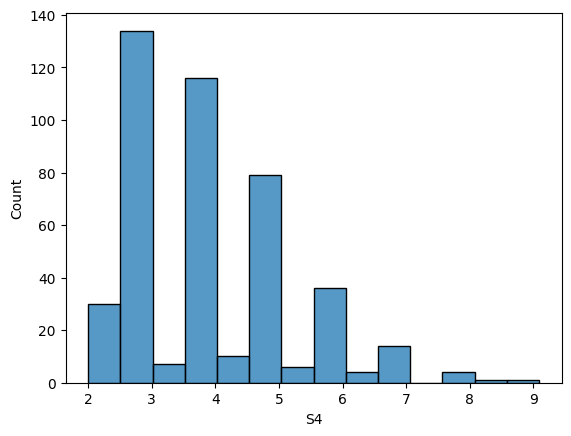

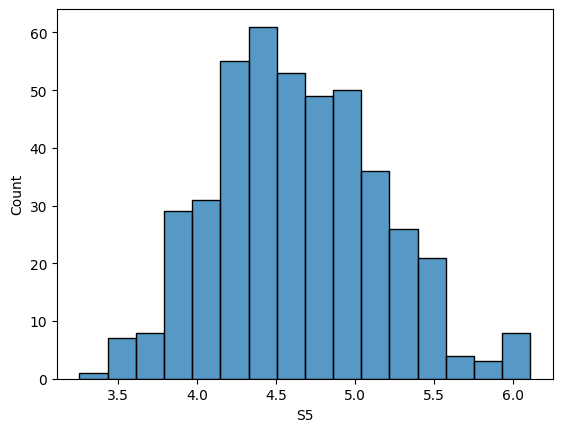

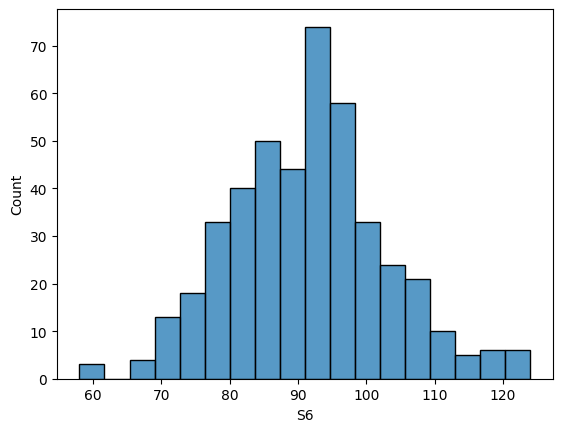

In [ ]:
# Plot the X variables for visualisation
for item in X_feature.columns:
    sns.histplot(data=X_feature[item])
    plt.xlabel(item)
    plt.show() 

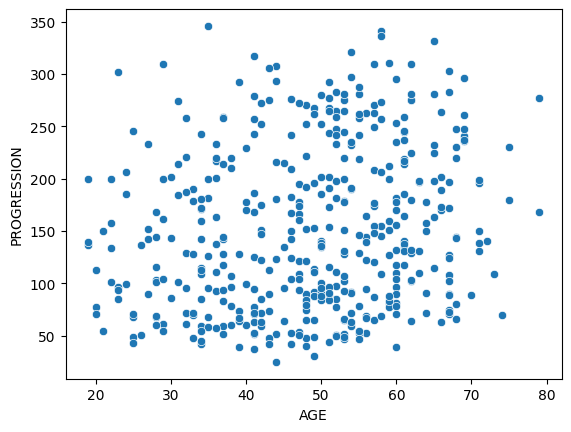

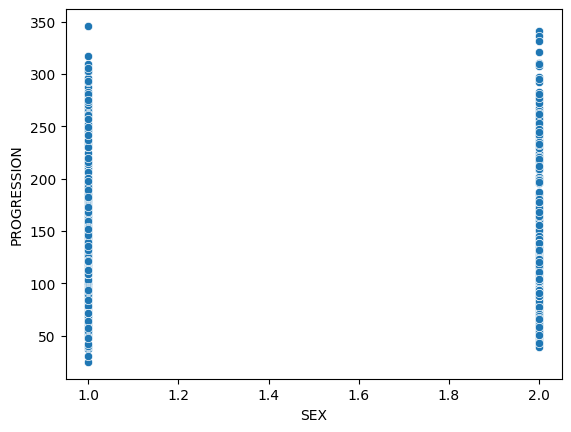

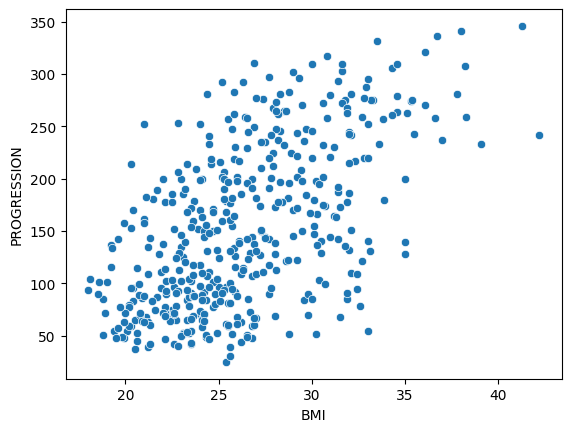

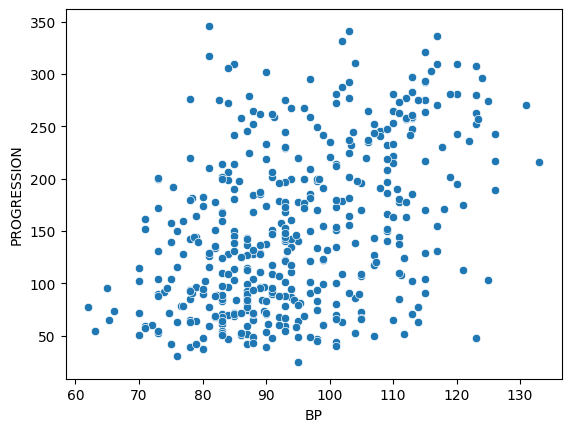

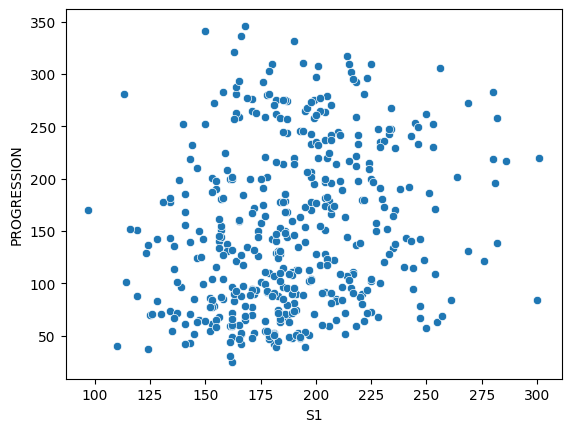

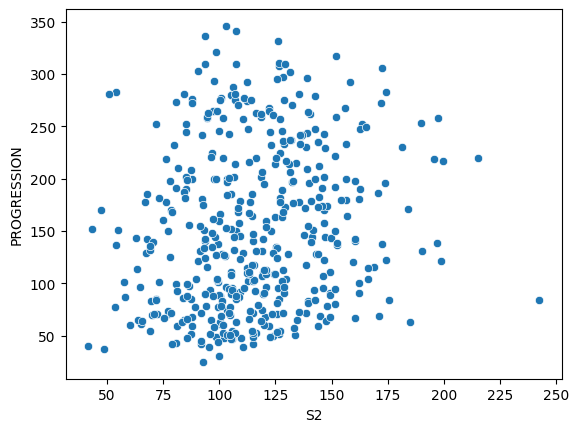

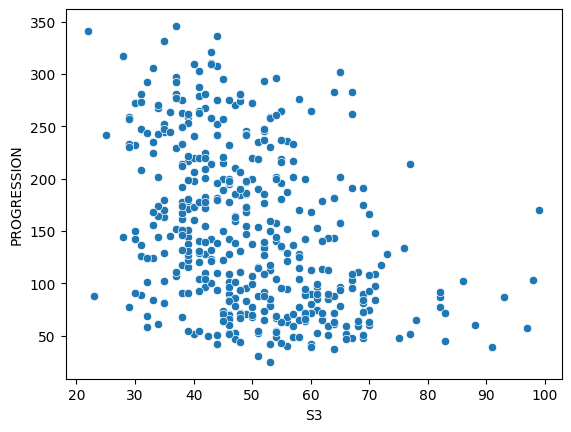

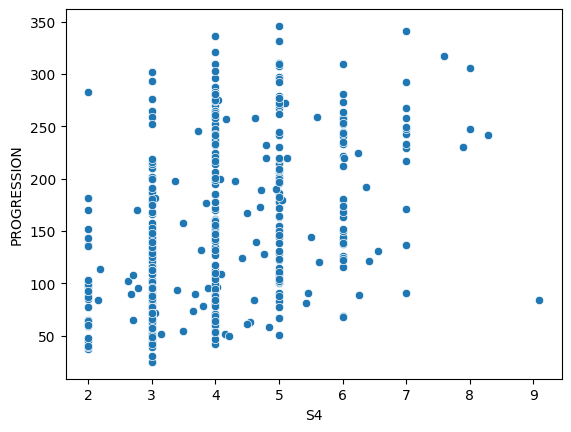

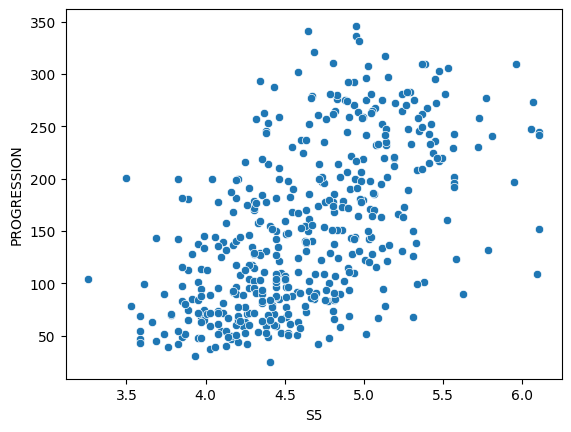

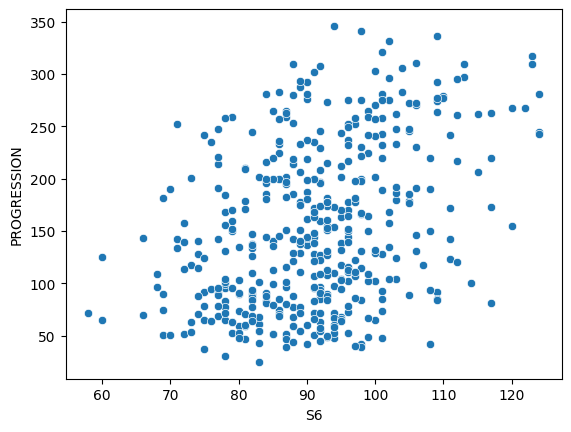

In [ ]:
# Plot the each of the independent variable against the dependent variable for a brief idea of correlation
for item in X_feature.columns:
    sns.scatterplot(data = X_feature, x= item, y=y_target)
    plt.show() # there seems to be some sort of correlations betweem the dependent variable and some but not all of the independent variables

In [12]:
# Split the dataset into training 80% and testing sets 20%
# Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42)

# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Initialize the multiple regression model
multi_reg_model = LinearRegression()

# Fit the model to the training data
multi_reg_model.fit(X_train,y_train)

#Print out the intercept and coefficients of the trained model
print('Intercept: ', multi_reg_model.intercept_)
print('Coefficients: ', multi_reg_model.coef_)

Intercept:  [-25.13322785]
Coefficients:  [[   8.2612689   -23.06446772  135.63561351   84.9935688  -244.80178532
   162.87932677   46.32729542   72.03113268  191.18672297   13.3055384 ]]


In [17]:
# Predict the dependent variable on the test set
y_pred = multi_reg_model.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
# Calculate the performance metrics
r2 = r2_score(y_test,y_pred)
print(f'R-squared: {r2}') # A R-squared of 45% is not good enough, this means the model predicts are correct 45% of the time

R-squared: 0.45260276297192004
